In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydotplus
import seaborn as sns; sns.set_theme()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
phish=pd.read_csv('phishing_url_dataset.csv')

In [3]:
phish

,url_length,valid_url,at_symbol,sensitive_words_count,path_length,isHttps,nb_dots,nb_hyphens,nb_and,nb_or,nb_www,nb_com,nb_underscore,target
0,42,0,0,0,20,0,2,0,0,0,1,1,0,0
1,73,0,0,0,52,0,5,0,0,0,0,1,0,0
2,73,0,0,0,52,0,5,0,0,0,0,1,0,0
3,73,0,0,0,52,0,5,1,0,1,0,1,0,0
4,73,0,0,0,52,0,5,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,50,1,0,0,0,0,4,3,0,0,0,0,0,1
2484,74,1,0,0,0,1,5,0,0,0,0,0,0,1
2485,74,1,0,0,0,1,5,0,0,0,0,0,1,1
2486,74,1,0,0,0,1,5,0,0,0,0,0,0,1


In [4]:
phish.shape

(2488, 14)

In [5]:
#Data Pre-processing, Deleting duplicate data in the dataset
Dup= phish.drop_duplicates
Dup

<bound method DataFrame.drop_duplicates of       url_length  valid_url  at_symbol  sensitive_words_count  path_length  \
0             42          0          0                      0           20   
1             73          0          0                      0           52   
2             73          0          0                      0           52   
3             73          0          0                      0           52   
4             73          0          0                      0           52   
...          ...        ...        ...                    ...          ...   
2483          50          1          0                      0            0   
2484          74          1          0                      0            0   
2485          74          1          0                      0            0   
2486          74          1          0                      0            0   
2487          74          1          0                      0            0   

      isHttps  nb_do

In [6]:
#Finding the null values in the dataset
phish.isnull()

,url_length,valid_url,at_symbol,sensitive_words_count,path_length,isHttps,nb_dots,nb_hyphens,nb_and,nb_or,nb_www,nb_com,nb_underscore,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2484,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2485,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2486,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#feature selection from the above dataset 
selected_cols=['url_length','valid_url','sensitive_words_count','at_symbol','path_length','nb_com']

In [8]:
#Data preparation
x=phish[selected_cols]
x
y=phish['target']
y=np.array(y)

In [9]:
#splitting the dataset
#By splitting the testing and training data the ratio of the testing data is 30% and training data is 70%
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1741, 6) (747, 6) (1741,) (747,)


In [11]:
#RandomForest classifier
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
classifier=RFC.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [12]:
print("The accuracy of the RandomForest classifier:", metrics.accuracy_score(y_test,prediction))

The accuracy of the RandomForest classifier: 0.8447121820615796


In [13]:
#Classification Report of the Random forest classifier
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       382
           1       0.87      0.80      0.83       365

    accuracy                           0.84       747
   macro avg       0.85      0.84      0.84       747
weighted avg       0.85      0.84      0.84       747



In [14]:
#Model evaluation ,metrics confusion matrix of Random forest classifier
cf_matrix1 = confusion_matrix(y_test,prediction)
cf_matrix1

array([[338,  44],
       [ 72, 293]])

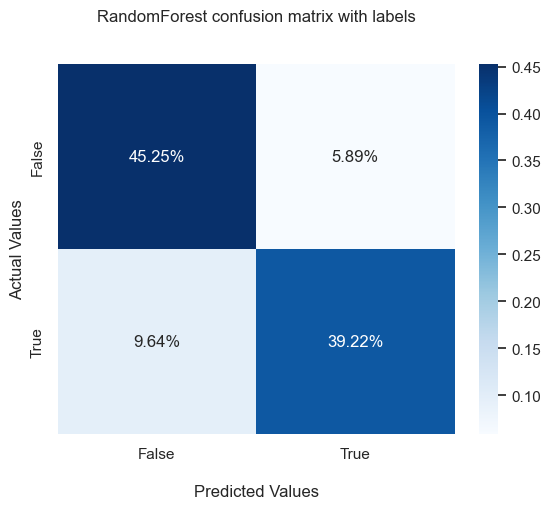

In [15]:
#heatmap of the Random forest , 
RFC = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, fmt='.2%', cmap='Blues')
RFC.set_title ('RandomForest confusion matrix with labels\n\n');
RFC.set_xlabel('\nPredicted Values')
RFC.set_ylabel('Actual Values')
RFC.xaxis.set_ticklabels(['False','True'])
RFC.yaxis.set_ticklabels(['False','True'])
#Visualisation of the Random forest Confusion matrix plot
plt.show()

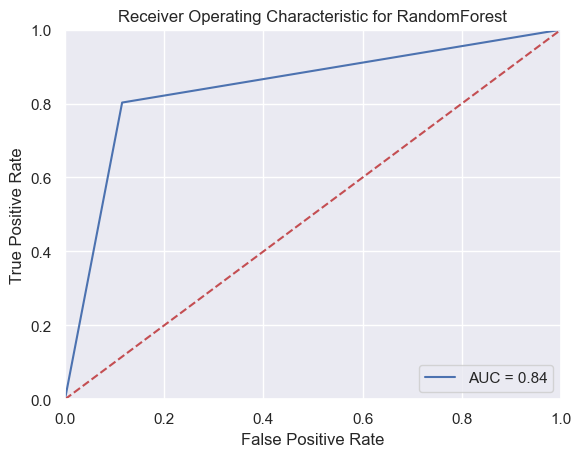

In [16]:
#ROC CURVE FOR Random Forest
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic for RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#SVM Classifier
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)
svm_classifier=svm.SVC(kernel='linear')
s=svm_classifier.fit(X_train,y_train)
y_prediction=s.predict(X_test)

In [18]:
print("The accuracy of the SVM classifier:", metrics.accuracy_score(y_test,y_prediction))

The accuracy of the SVM classifier: 0.7811244979919679


In [19]:
#Classification Report of the SVM
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       258
           1       0.96      0.57      0.72       240

    accuracy                           0.78       498
   macro avg       0.83      0.77      0.77       498
weighted avg       0.83      0.78      0.77       498



In [20]:
#Model evaluation ,metrics confusion matrix of SVM
cf_matrix2 = confusion_matrix(y_test,y_prediction)
cf_matrix2

array([[252,   6],
       [103, 137]])

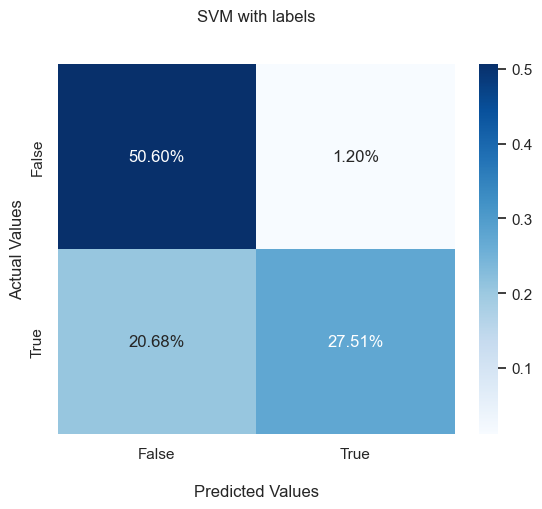

In [21]:
#heatmap of the SVM 
RFC = sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, fmt='.2%', cmap='Blues')
RFC.set_title ('SVM with labels\n\n');
RFC.set_xlabel('\nPredicted Values')
RFC.set_ylabel('Actual Values')
RFC.xaxis.set_ticklabels(['False','True'])
RFC.yaxis.set_ticklabels(['False','True'])
#Visualisation of the SVM Confusion matrix plot
plt.show()

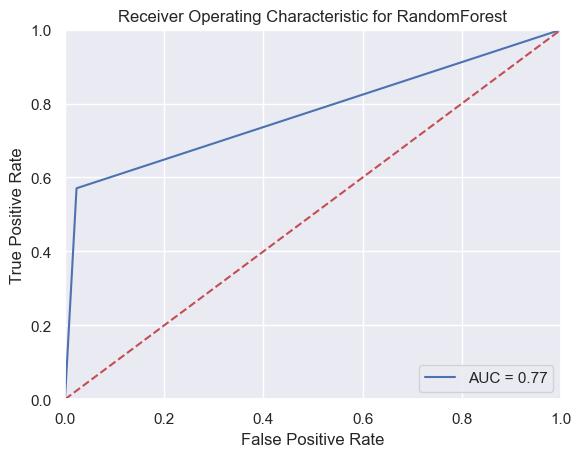

In [22]:
#ROC CURVE for SVM
fpr, tpr, threshold = metrics.roc_curve(y_test, y_prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic for RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
#DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
Decision_pre= clf.predict(X_test)
accuracyscore= clf.score(X_test,y_test)
print(accuracyscore)

0.8473895582329317


In [24]:
#Classification Report of the Decisiontree
print(classification_report(y_test,Decision_pre))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       258
           1       0.89      0.78      0.83       240

    accuracy                           0.85       498
   macro avg       0.85      0.84      0.85       498
weighted avg       0.85      0.85      0.85       498



In [25]:
#Model evaluation ,metrics confusion matrix of Decisiontree
cf_matrix3 = confusion_matrix(y_test,Decision_pre)
cf_matrix3

array([[236,  22],
       [ 54, 186]])

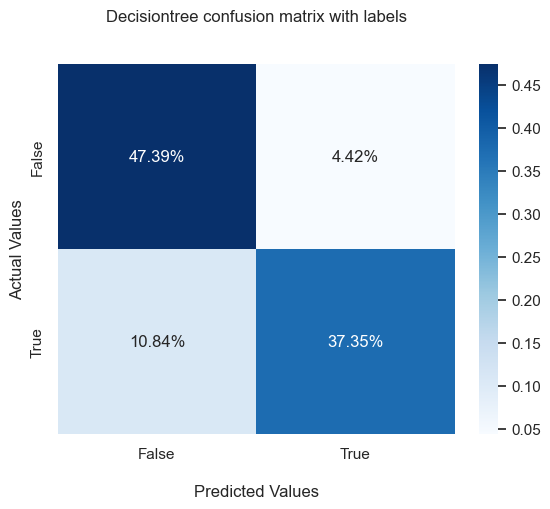

In [26]:
#heatmap of the Decisiontree 
RFC = sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, fmt='.2%', cmap='Blues')
RFC.set_title ('Decisiontree confusion matrix with labels\n\n');
RFC.set_xlabel('\nPredicted Values')
RFC.set_ylabel('Actual Values')
RFC.xaxis.set_ticklabels(['False','True'])
RFC.yaxis.set_ticklabels(['False','True'])
#Visualisation of the Decisiontree Confusion matrix plot
plt.show()

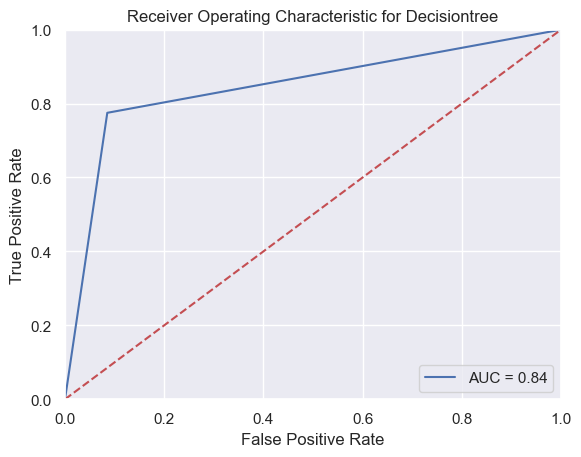

In [27]:
#ROC CURVE for Decisiontree
fpr, tpr, threshold = metrics.roc_curve(y_test, Decision_pre)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic for Decisiontree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
#KNN classifier model
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(X_train,y_train)
#Predict Output
KNN_Predict= model.predict(X_test)

/Users/subramanyamserva/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
print("The accuracy of the KNN classifier model:", metrics.accuracy_score(y_test,KNN_Predict))

The accuracy of the KNN classifier model: 0.7911646586345381


In [30]:
#Classification Report of the KNeighbors
print(classification_report(y_test,KNN_Predict))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       258
           1       0.82      0.72      0.77       240

    accuracy                           0.79       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.79      0.79      0.79       498



In [31]:
#Model evaluation ,metrics confusion matrix of KNeighbors
cf_matrix4 = confusion_matrix(y_test,KNN_Predict)
cf_matrix4

array([[221,  37],
       [ 67, 173]])

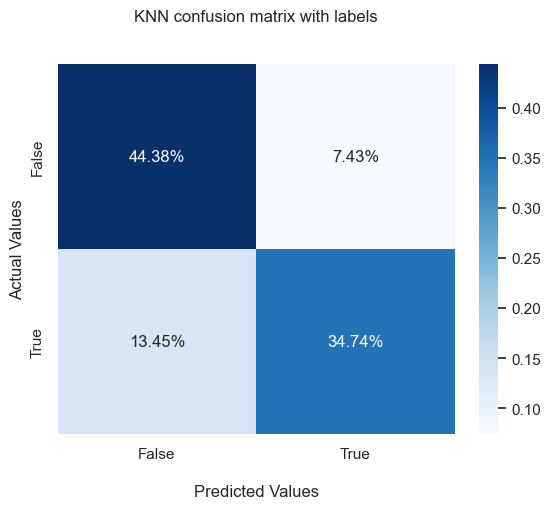

In [32]:
#heatmap of the KNeighbors
RFC = sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True, fmt='.2%', cmap='Blues')
RFC.set_title ('KNN confusion matrix with labels\n\n');
RFC.set_xlabel('\nPredicted Values')
RFC.set_ylabel('Actual Values')
RFC.xaxis.set_ticklabels(['False','True'])
RFC.yaxis.set_ticklabels(['False','True'])
#Visualisation of the KNeighbors Confusion matrix plot
plt.show()

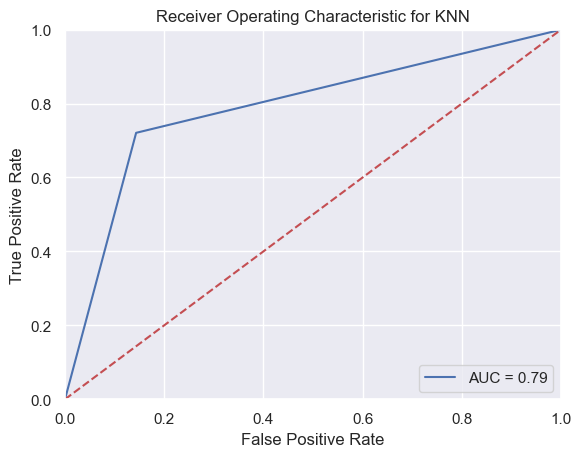

In [33]:
#ROC CURVE for KNeighbors
fpr, tpr, threshold = metrics.roc_curve(y_test, KNN_Predict)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()